1-D Convective Heat Transfer
======
***

Governing Equation
-----
***

The one-dimensional convective heat transfer equation is:

$$\frac{\partial u}{\partial t}= k \frac{\partial^2 T}{\partial x^2}$$

The first thing you should notice is that —unlike the previous two simple equations we have studied— this equation has a second-order derivative. We first need to learn what to do with it!

### Discretizing $\frac{\partial ^2 T}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative.  We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative.  Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$T_{i+1} = T_i + \Delta x \frac{\partial T}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 T}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 T}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$T_{i-1} = T_i - \Delta x \frac{\partial T}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 T}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 T}{\partial x^3}\bigg|_i + O(\Delta x^4)$

If we add these two expansions, you can see that the odd-numbered derivative terms will cancel each other out.  If we neglect any terms of $O(\Delta x^4)$ or higher (and really, those are very small), then we can rearrange the sum of these two expansions to solve for our second-derivative.  


$T_{i+1} + u_{i-1} = 2T_i+\Delta x^2 \frac{\partial ^2 T}{\partial x^2}\bigg|_i + O(\Delta x^4)$

Then rearrange to solve for $\frac{\partial ^2 T}{\partial x^2}\bigg|_i$ and the result is:

$$\frac{\partial ^2 T}{\partial x^2}=\frac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


### Discretization for Entire the Governing Equation

We can now write the discretized version of the diffusion equation in 1D:

$$\frac{T_{i}^{n+1}-u_{i}^{n}}{\Delta t}=k\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\Delta x^2}$$

As before, we notice that once we have an initial condition, the only unknown is $T_{i}^{n+1}$, so we re-arrange the equation solving for our unknown:

$$T_{i}^{n+1}=T_{i}^{n}+\frac{k \Delta t}{\Delta x^2}(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n})$$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition. Let's continue using our favorite: the hat function. So, at $t=0$, $u=2$ in the interval $0.5\le x\le 1$ and $u=1$ everywhere else. We are ready to number-crunch!

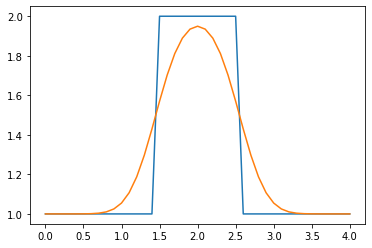

In [21]:
import numpy                 #loading our favorite library
from matplotlib import pyplot    #and the useful plotting library
%matplotlib inline

nx = 41
length = 4
dx = lenght / (nx - 1)
nt = 20    #the number of timesteps we want to calculate
k = 0.3   #the value of thermal conductivity 
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / k #dt is defined using sigma ... more later!


u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.75 / dx):int(1.25 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

pyplot.plot(numpy.linspace(0, length, nx), u)

un = numpy.ones(nx) #our placeholder array, un, to advance the solution in time

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + k * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        

pyplot.plot(numpy.linspace(0, length, nx), u);

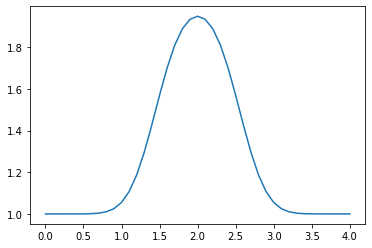

In [20]:
pyplot.plot(numpy.linspace(0, length, nx), u);

## Learn More

For a careful walk-through of the discretization of the diffusion equation with finite differences (and all steps from 1 to 4), watch **Video Lesson 4** by Prof. Barba on YouTube.

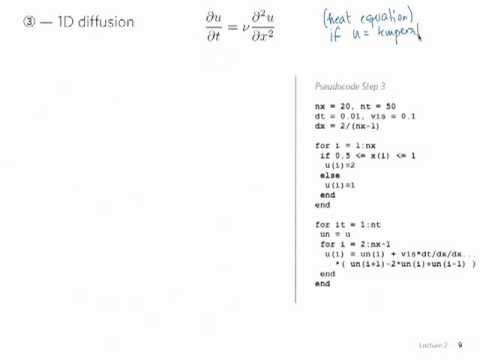

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)